In [5]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import leastsq,curve_fit

In [6]:
def sin(t,amp,freq,phase,offset):
    res = (amp*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def est_freq(ydata,tgap,tau,amp,freq,phase,offset): # Estimation of frequency change (from dy/df where y=sinusoidal fit)
    res=(ydata-decaying_sin(tau,tgap,amp,freq,phase,offset))/(amp*np.exp(-tgap/tau)*2*np.pi*tgap*np.cos(2*np.pi*freq*tgap+phase))
    return res

def gaussian(x,amp,x0,sigma,offset):
    res=(amp*np.exp((-(x-x0)**2)/(sigma**2)))+offset
    return res

assorted_roi1freqs={}
assorted_roi1perr={}
assorted_roi2freqs={}
assorted_roi2perr={}
# exp_ids=['2018_02_09_14_52_05_Microwave and 780A Ramsey, AOM at 160 MHz',
#         '2018_02_09_15_22_36_Microwave and 780A Ramsey, AOM at 159 MHz',
#          '2018_02_09_15_55_14_Microwave and 780A Ramsey, AOM at 158 MHz',
#          '2018_02_09_16_26_57_Microwave and 780A Ramsey, AOM at 157 MHz'
#          ']

# fAOM=160 MHz

In [21]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_02_09_14_52_05_Microwave and 780A Ramsey, AOM at 160 MHz'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

<IPython.core.display.Javascript object>


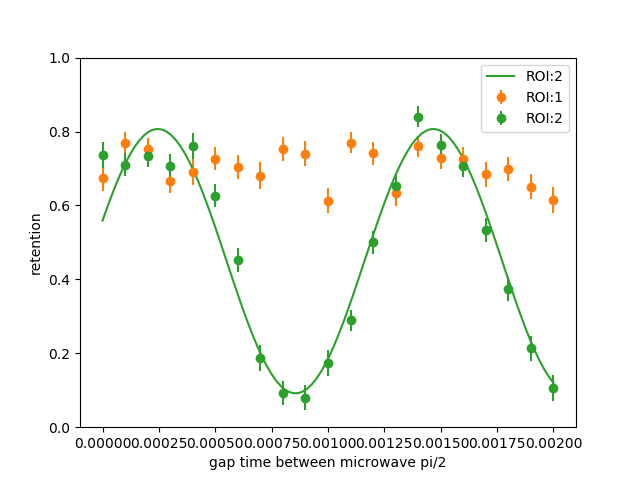

ROI:2, tau : 8567.63987834, amplitude 0.357754265196 , freq:818.174795878(16.3835292819), phase:0.311867344944, offset:0.449248310904


In [22]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.01,0.4,1000,0,0.4]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
fitted_parameters_perr=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
        perr = np.sqrt(np.diag(pcov))
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}({}), phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],perr[2],fit[3],fit[4])
        fitted_parameters.append(fit)
        fitted_parameters_perr.append(perr)
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])
        
        if roi==1:
            assorted_roi1freqs[exp_id]=fit[2]
            assorted_roi1perr[exp_id]=perr[2]
        elif roi==2:
            assorted_roi2freqs[exp_id]=fit[2]
            assorted_roi2perr[exp_id]=perr[2]

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

In [19]:
print fitted_parameters
print fitted_parameters_perr

[0.0076454940357846305, 0.0079408649500390532]
[array([  4.04714245e+09,   4.42117154e-02,   1.63835293e+01,
         1.18540620e-01,   1.62691176e-02])]


# fAOM=159 MHz

In [23]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_02_09_15_22_36_Microwave and 780A Ramsey, AOM at 159 MHz'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

<IPython.core.display.Javascript object>


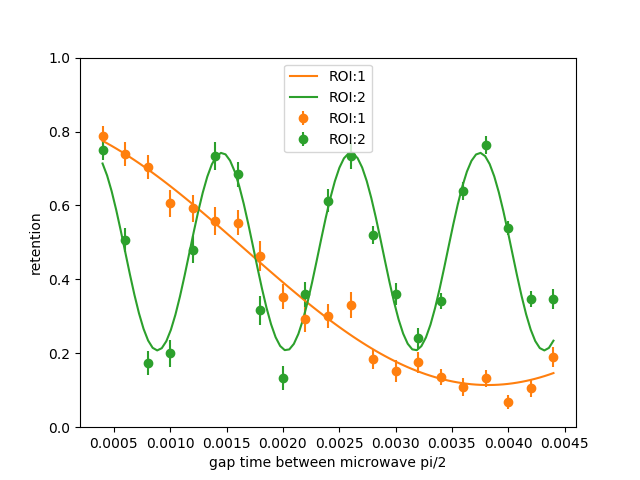

ROI:1, tau : 6522.6401341, amplitude -0.368766344483 , freq:115.638282399(36.8130355306), phase:5.07885977885, offset:0.482886693095
ROI:2, tau : -737574.76206, amplitude 0.267341294283 , freq:874.127657736(9.67990570645), phase:-0.156413732739, offset:0.475053152522


In [26]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.01,0.4,1000,0,0.5]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
        perr = np.sqrt(np.diag(pcov))
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}({}), phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],perr[2],fit[3],fit[4])
        fitted_parameters.append(fit)
        #fitted_parameters_perr.append(perr)
        fitted_parameters.append(fit[0])
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])
        
        if roi==1:
            assorted_roi1freqs[exp_id]=fit[2]
            assorted_roi1perr[exp_id]=perr[2]
        elif roi==2:
            assorted_roi2freqs[exp_id]=fit[2]
            assorted_roi2perr[exp_id]=perr[2]

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

# fAOM=158 MHz

In [27]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_02_09_15_55_14_Microwave and 780A Ramsey, AOM at 158 MHz'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

<IPython.core.display.Javascript object>


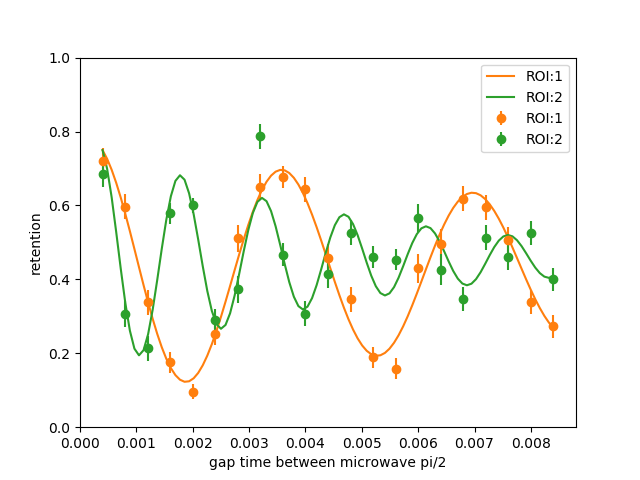

ROI:1, tau : 0.0129186450853, amplitude 0.353896648913 , freq:294.944355354(3.14423020331), phase:1.18747466803, offset:0.428293042265
ROI:2, tau : 0.00455739047565, amplitude 0.331679192697 , freq:687.89871697(12.1972049686), phase:0.117973455019, offset:0.457443744247


In [29]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.01,0.4,500,0,0.5]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
        perr = np.sqrt(np.diag(pcov))
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}({}), phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],perr[2],fit[3],fit[4])
        fitted_parameters.append(fit)
        #fitted_parameters_perr.append(perr)
        fitted_parameters.append(fit[0])
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])
        
        if roi==1:
            assorted_roi1freqs[exp_id]=fit[2]
            assorted_roi1perr[exp_id]=perr[2]
        elif roi==2:
            assorted_roi2freqs[exp_id]=fit[2]
            assorted_roi2perr[exp_id]=perr[2]

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

# fAOM=157 MHz

In [30]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_02_09_16_26_57_Microwave and 780A Ramsey, AOM at 157 MHz'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

<IPython.core.display.Javascript object>


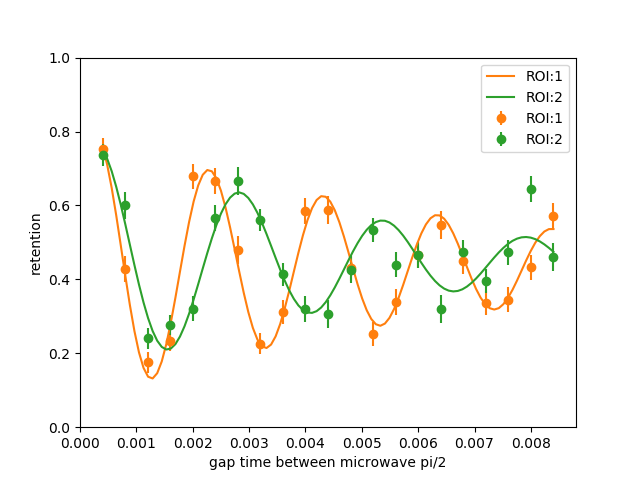

ROI:1, tau : 0.00639652996721, amplitude 0.372312345978 , freq:493.419325727(4.32969420327), phase:0.730211432972, offset:0.436225304287
ROI:2, tau : 0.00479151842108, amplitude 0.333811686894 , freq:393.458591385(10.2097238699), phase:0.798583061065, offset:0.450696501371


In [31]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.01,0.4,500,0,0.5]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
        perr = np.sqrt(np.diag(pcov))
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}({}), phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],perr[2],fit[3],fit[4])
        fitted_parameters.append(fit)
        #fitted_parameters_perr.append(perr)
        fitted_parameters.append(fit[0])
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])
        
        if roi==1:
            assorted_roi1freqs[exp_id]=fit[2]
            assorted_roi1perr[exp_id]=perr[2]
        elif roi==2:
            assorted_roi2freqs[exp_id]=fit[2]
            assorted_roi2perr[exp_id]=perr[2]

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

# fAOM=156 MHz

In [32]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_02_09_17_04_29_Microwave and 780A Ramsey, AOM at 156 MHz'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

<IPython.core.display.Javascript object>


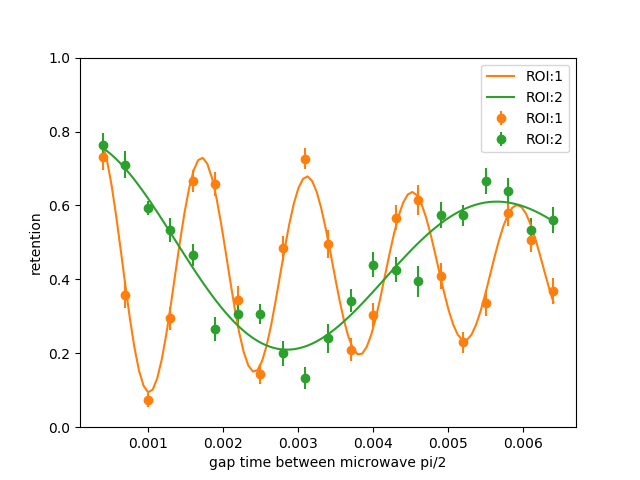

ROI:1, tau : 0.00764549403578, amplitude -0.379776497123 , freq:714.601009906(3.9052557658), phase:-3.03571392186, offset:0.42620828664
ROI:2, tau : 0.00794086495004, amplitude 0.338883096373 , freq:179.210055433(11.5729796522), phase:1.38681020636, offset:0.444884883361


In [34]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.01,0.4,400,0,0.5]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
        perr = np.sqrt(np.diag(pcov))
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}({}), phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],perr[2],fit[3],fit[4])
        fitted_parameters.append(fit)
        #fitted_parameters_perr.append(perr)
        fitted_parameters.append(fit[0])
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])
        
        if roi==1:
            assorted_roi1freqs[exp_id]=fit[2]
            assorted_roi1perr[exp_id]=perr[2]
        elif roi==2:
            assorted_roi2freqs[exp_id]=fit[2]
            assorted_roi2perr[exp_id]=perr[2]

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

# fAOM=155 MHz

In [35]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_02_09_17_39_50_Microwave and 780A Ramsey, AOM at 155 MHz'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

<IPython.core.display.Javascript object>


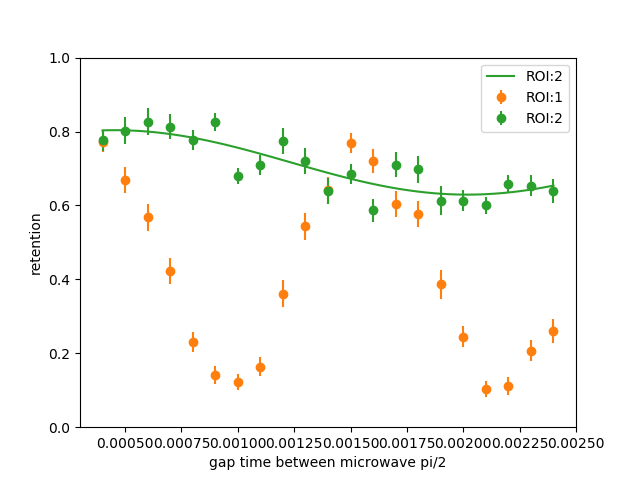

ROI:2, tau : -505.043071436, amplitude 0.0871818217121 , freq:-319.529746067(127.853740845), phase:2.47967178559, offset:0.716447303718


In [44]:
def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.1,0.4,10,0.6,0.4]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
        perr = np.sqrt(np.diag(pcov))
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}({}), phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],perr[2],fit[3],fit[4])
        fitted_parameters.append(fit)
        #fitted_parameters_perr.append(perr)
        fitted_parameters.append(fit[0])
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])
        
        if roi==1:
            assorted_roi1freqs[exp_id]=fit[2]
            assorted_roi1perr[exp_id]=perr[2]
        elif roi==2:
            assorted_roi2freqs[exp_id]=fit[2]
            assorted_roi2perr[exp_id]=perr[2]

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

In [35]:
fit

array([ -3.92495384e-01,   3.20161928e-01,   8.31033083e+02,
        -3.32721134e-01,   4.37934258e-01])

# fAOM=154 MHz

In [45]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_02_09_18_15_52_Microwave and 780A Ramsey, AOM at 154 MHz'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

<IPython.core.display.Javascript object>


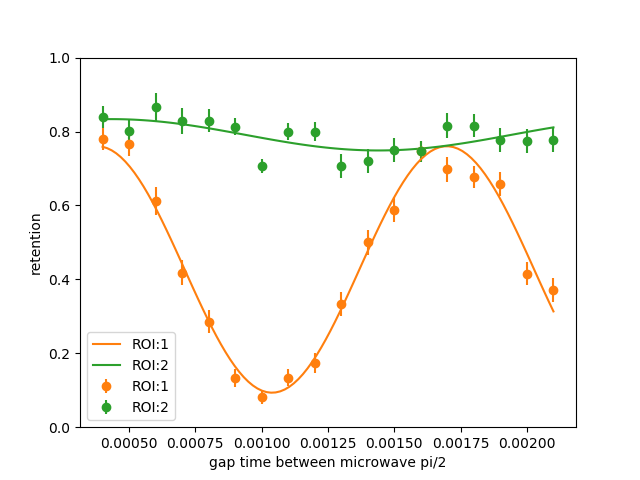

ROI:1, tau : -100849.138265, amplitude 0.333433756632 , freq:758.919380158(14.5537083771), phase:-0.241644067752, offset:0.426777779509
ROI:2, tau : -7514.48351134, amplitude 0.0423926964735 , freq:497.586150798(232.222933186), phase:0.210811737813, offset:0.791152588561


In [46]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.01,0.4,500,0,0.4]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
        perr = np.sqrt(np.diag(pcov))
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}({}), phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],perr[2],fit[3],fit[4])
        fitted_parameters.append(fit)
        #fitted_parameters_perr.append(perr)
        fitted_parameters.append(fit[0])
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])
        
        if roi==1:
            assorted_roi1freqs[exp_id]=fit[2]
            assorted_roi1perr[exp_id]=perr[2]
        elif roi==2:
            assorted_roi2freqs[exp_id]=fit[2]
            assorted_roi2perr[exp_id]=perr[2]

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

# fAOM=153 MHz

In [47]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_02_09_18_47_33_Microwave and 780A Ramsey, AOM at 153 MHz'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

<IPython.core.display.Javascript object>


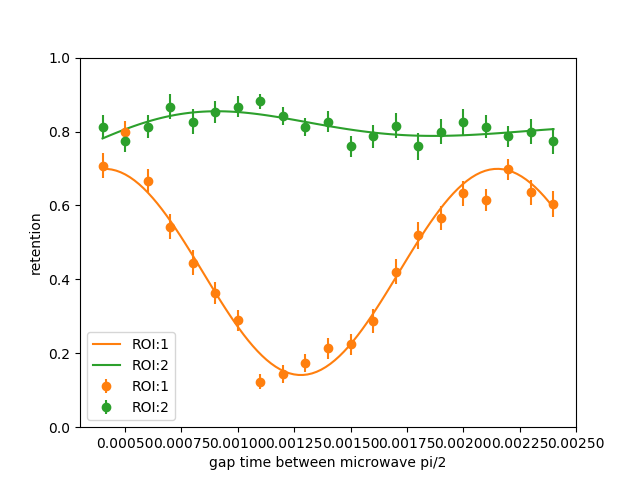

ROI:1, tau : -89006.9945579, amplitude 0.278937454063 , freq:573.935627436(17.8104274688), phase:0.0965131491503, offset:0.420086469121
ROI:2, tau : 0.00111238127634, amplitude 0.110035462352 , freq:519.709297581(83.7772313151), phase:-1.66114552369, offset:0.807912940991


In [48]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.01,0.4,0,0,0.4]
roi_dependency=[0,0,-400,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
        perr = np.sqrt(np.diag(pcov))
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}({}), phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],perr[2],fit[3],fit[4])
        fitted_parameters.append(fit)
        #fitted_parameters_perr.append(perr)
        fitted_parameters.append(fit[0])
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])
        
        if roi==1:
            assorted_roi1freqs[exp_id]=fit[2]
            assorted_roi1perr[exp_id]=perr[2]
        elif roi==2:
            assorted_roi2freqs[exp_id]=fit[2]
            assorted_roi2perr[exp_id]=perr[2]

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()

In [65]:
print assorted_roi1freqs
print assorted_roi1perr
#print assorted_roi2freqs
#print assorted_roi2perr


{'2018_02_09_17_04_29_Microwave and 780A Ramsey, AOM at 156 MHz': 714.60100990624471, '2018_02_09_17_39_50_Microwave and 780A Ramsey, AOM at 155 MHz': 831.03308281728823, '2018_02_09_18_47_33_Microwave and 780A Ramsey, AOM at 153 MHz': 573.93562743596692, '2018_02_09_18_15_52_Microwave and 780A Ramsey, AOM at 154 MHz': 758.91938015760661, '2018_02_09_15_22_36_Microwave and 780A Ramsey, AOM at 159 MHz': 115.63828239879714, '2018_02_09_15_55_14_Microwave and 780A Ramsey, AOM at 158 MHz': 294.94435535403113, '2018_02_09_16_26_57_Microwave and 780A Ramsey, AOM at 157 MHz': 493.41932572713694}
{'2018_02_09_17_04_29_Microwave and 780A Ramsey, AOM at 156 MHz': 16.383529281913372, '2018_02_09_17_39_50_Microwave and 780A Ramsey, AOM at 155 MHz': 16.383529281913372, '2018_02_09_18_47_33_Microwave and 780A Ramsey, AOM at 153 MHz': 16.383529281913372, '2018_02_09_18_15_52_Microwave and 780A Ramsey, AOM at 154 MHz': 16.383529281913372, '2018_02_09_15_22_36_Microwave and 780A Ramsey, AOM at 159 MHz'

# middle of r1 and r2


In [3]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_02_09_19_41_47_Microwave and 780A Ramsey, AOM at the middle'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

C:\Users\Rb\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Rb\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


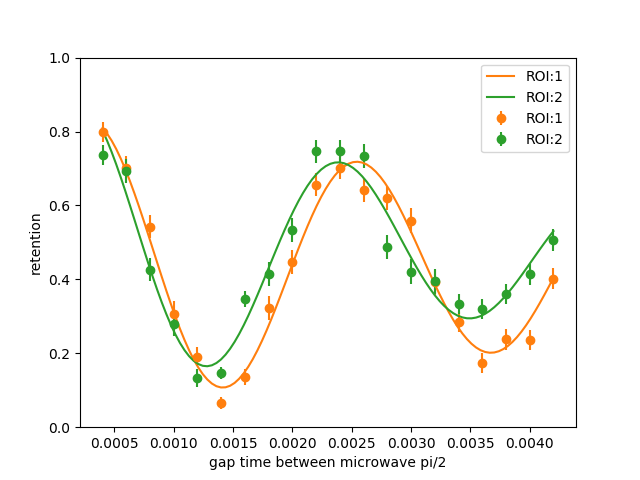

ROI:1, tau : 0.00675020782774, amplitude 0.40867108722 , freq:442.640794012, phase:0.728724079502, offset:0.438241355241
ROI:2, tau : 0.00414456505857, amplitude 0.426784963151 , freq:451.066712556, phase:1.01222179111, offset:0.477461351478


In [4]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fit_guesses=[0.01,0.4,500,0,0.4]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
    try:
        fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
    except RuntimeError:
        error=1
    if error is not 1:
        print "ROI:{}, tau : {}, amplitude {} , freq:{}, phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],fit[3],fit[4])
        fitted_parameters.append(fit[0])
        xarray=np.linspace(np.min(data),np.max(data),100)
        yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
        plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])

plt.show()
ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')
ax.legend()